# Exploratory Data Analysis for Hair Type Classification

**Goals of This Notebook:**
- Conduct a structured exploratory analysis of the Hair Type dataset to understand its characteristics before building any classification or clustering models

- Examine class distributions, visual variability, image statistcs, basic texture patterns that may relate to curl tightness

- These insights are the foundation to the later stages of the project: (1) training VGG16-based CNN to classify the four broad hair categories, and (2) extracting texture and curl features to explore finer curl patterned (similiar to the Andrew Walker types) emerge through unsupervised clustering

#### Note: Some cells include working notes and ideas intended for my report

C:\Users\nisa2\anaconda3\envs\tf310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset downloaded at:  C:\Users\nisa2\.cache\kagglehub\datasets\kavyasreeb\hair-type-dataset\versions\1


In [15]:
# libraries
import kagglehub
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import os
import matplotlib.pyplot as plt
from glob import glob


In [5]:
# random seeds

np.random.seed(42)
tf.random.set_seed(42)

# Dataset Exploration (EDA)

## Load Dataset & Inspect Metadata

- for "Dataset Description" of report

In [60]:
# download kaggle dataset
kaggle_hairtype_dataset_path = kagglehub.dataset_download('kavyasreeb/hair-type-dataset')

print("Dataset downloaded at: ", kaggle_hairtype_dataset_path )

data_dir = kaggle_hairtype_dataset_path # dataset path

Dataset downloaded at:  C:\Users\nisa2\.cache\kagglehub\datasets\kavyasreeb\hair-type-dataset\versions\1


In [61]:
# print folder structure
print("Dataset Folder Structure: \n")

for root, dirs, files in os.walk(data_dir):
    level = root.replace(data_dir, "").count(os.sep)
    indent = " " * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = " " * 4  * (level + 1)

    for file in files[:5]:
        print(f"{subindent}{file}")


Dataset Folder Structure: 

1/
    data/
        curly/
            00cbad1ffe22d900018e5a2e7376daed4.jpg
            0160dfee18352aa9bf5c6e617de9e07b4.jpg
            03312ac556a7d003f7570657f80392c34.jpg
            0fd85bcde626a95e20489c83f292d8204.jpg
            1-curly-hair-with-bangs-CYFg6l_Ls4-.jpg
        dreadlocks/
            05740e64c1d611e74723ed4103776b71.jpg
            0a62ef878341056d842dbde6365f9c4a4.jpg
            0fgjhs702ob4uoi75.jpg
            1-rihanna-dreadlocks.jpg
            11-small-side-swept-dreads-CC7LDipp1aw.jpg
        kinky/
            011b913aca7afbdd7feb6cdd4481b3bf4.jpg
            037f2da43c5f2c5be1e462ca5aad1c43.jpg
            057656ef97f71b87e933f8608e3e1f7b.jpg
            07.13_blog_dry_curly_hair-1024x410.jpg
            0c371e87183918327339725daef22cb9.jpg
        Straight/
            000028d73-Nicole_Scherzinger.jpg
            01-10-2019-latest-haircut-for-girls_Equal_Length_4PNG.jpg
            01-10-2019-latest-haircut-for-girls_sho

In [62]:
data_dir = os.path.join(data_dir, "data")

# extract imgs
img_paths = glob(os.path.join(data_dir, "*", "*.jpg"))

# extract labels
labels = [os.path.basename(os.path.dirname(path)) for path in img_paths]

# dataframe
df = pd.DataFrame({
    "image_path": img_paths,
    "label": labels
})

# filter labels (dreads is not a hair type)

df = df[df["label"].isin(["Straight", "Wavy", "curly", "kinky"])]

pd.set_option("display.max_colwidth", None)
df.head()

,image_path,label
0,C:\Users\nisa2\.cache\kagglehub\datasets\kavyasreeb\hair-type-dataset\versions\1\data\curly\00cbad1ffe22d900018e5a2e7376daed4.jpg,curly
1,C:\Users\nisa2\.cache\kagglehub\datasets\kavyasreeb\hair-type-dataset\versions\1\data\curly\0160dfee18352aa9bf5c6e617de9e07b4.jpg,curly
2,C:\Users\nisa2\.cache\kagglehub\datasets\kavyasreeb\hair-type-dataset\versions\1\data\curly\03312ac556a7d003f7570657f80392c34.jpg,curly
3,C:\Users\nisa2\.cache\kagglehub\datasets\kavyasreeb\hair-type-dataset\versions\1\data\curly\0fd85bcde626a95e20489c83f292d8204.jpg,curly
4,C:\Users\nisa2\.cache\kagglehub\datasets\kavyasreeb\hair-type-dataset\versions\1\data\curly\1-curly-hair-with-bangs-CYFg6l_Ls4-.jpg,curly


## Dataset Overview

- good for Experiment Settings and Benchmark Data section of report

In [63]:
# total number of images
total_images = len(df)
print("Total images in dataset: ", total_images)

# number of images per class
img_in_class_count = df["label"].value_counts()
print("Total number of images per class:\n", img_in_class_count)

Total images in dataset:  1410
Total number of images per class:
 label
curly       478
Straight    438
Wavy        284
kinky       210
Name: count, dtype: int64


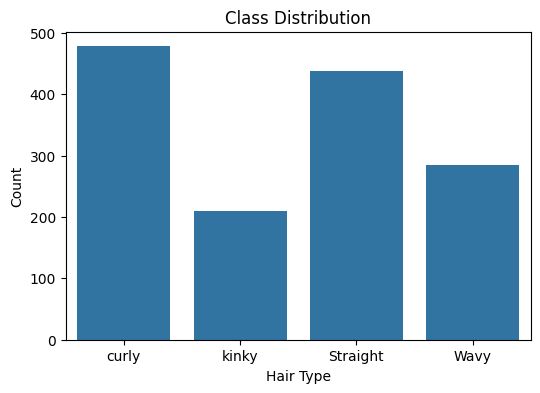

In [64]:
# bar chart visualization of class distribution # class imbalance ratio
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='label')
plt.title("Class Distribution")
plt.xlabel("Hair Type")
plt.ylabel("Count")
plt.show()

## Display Sample Images

Why:
- See Data diversity
- see lighting/background issues (can be mentioned in report)
- see if curliness is visually apparent

figures would go well in report

(delete or rewrite later)

In [ ]:
# One figure per class
# display 10 images per class

## Image Dimensions & Aspect Ratio

- Good for justifiing resizing decisions before sending images into VGG16

In [ ]:
# load images

# print shapes (height, width, channels)

# count frequency of unique dimensions

# visualize histogram of aspect ratios

## Image Statisitics (to analyze class differences for CNN)

 - Average brightness
 - Average color histograms per channel
 - hair-region pixel proportion
 
 helps answer these if want to put in report:
 - does hair type correlate with brightness or color distributions
 - do curly/kinky images have different texture intensity

In [ ]:
# convert sample images to grayscale

In [ ]:
# compute average brightness per image

In [ ]:
# plot brightness distribution per image

In [ ]:
# compute color histograms for RGB channels

## Edge Detection Exploration

This is an insight into hair texture

Insight goals:
- curly and kinky hair have more edges
- straight hair have smoother regions

-- this supports reasoning for feature extraction and curl tightness

In [ ]:
# apply Canny edge detection on sample images

In [ ]:
# plot number of edge pixels per class

## Texture Feature Exploration

-- to show why texture matters and motivate feature extraction

### Gabor Filter
- show frequency and orietation patterns
---- curly texture produce unique responses

In [ ]:
# show frequency and orientation patterns

### Local Binary Patterns
- lbp is good for strand texture

### GLCM Metrics
- contrast, homogeneity, energy, entropy

In [ ]:
# contrast

# homogeneity

# energy

# entropy

## Feature DataFrame Preview

-- 40 random images for preview

image       label          curl_tightness        glcm contrast         density

-- for technical details

## Dimentionality Reduction Preview


-- this will help prove that there is a possiblilty what i will do will work

-- can show sepraretion between classes and potential subclutsters within images

In [ ]:
# run PCA on preview dataset

In [ ]:
# plot points colors by class (straight, wavy, curly, kinky)

## Prepare Data for Classification (VGG16)

In [ ]:
# image resize size

In [ ]:
# train, val, and test split paths

In [ ]:
# preprocess input